# Logistic Regression

### Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Load the dataset
df = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\bank-full.csv",sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [15]:
# Summary statistics
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

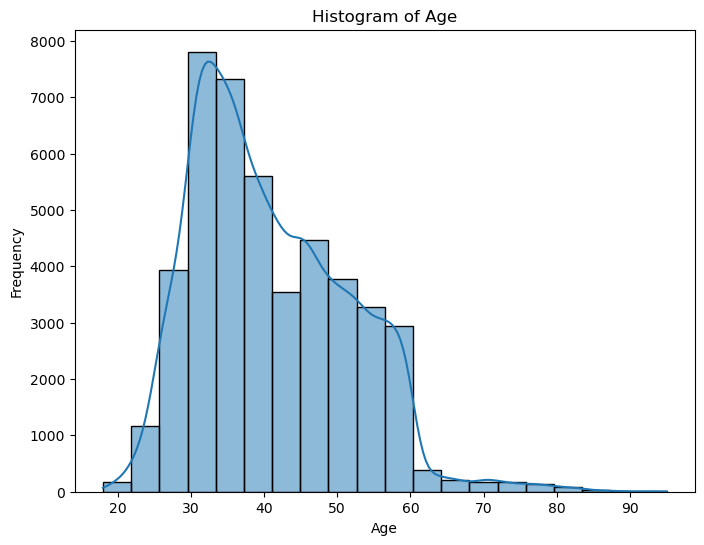

In [16]:
# Univariate Analysis
# Histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

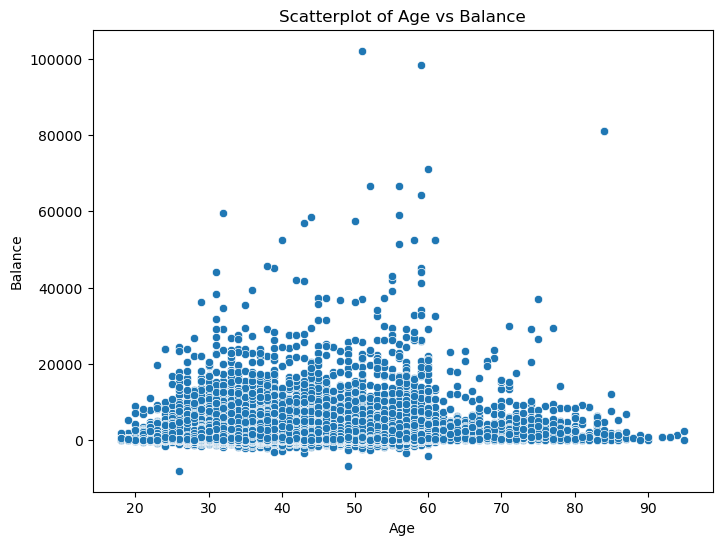

In [17]:
# Bivariate Analysis
# Scatterplot of balance vs age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Scatterplot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

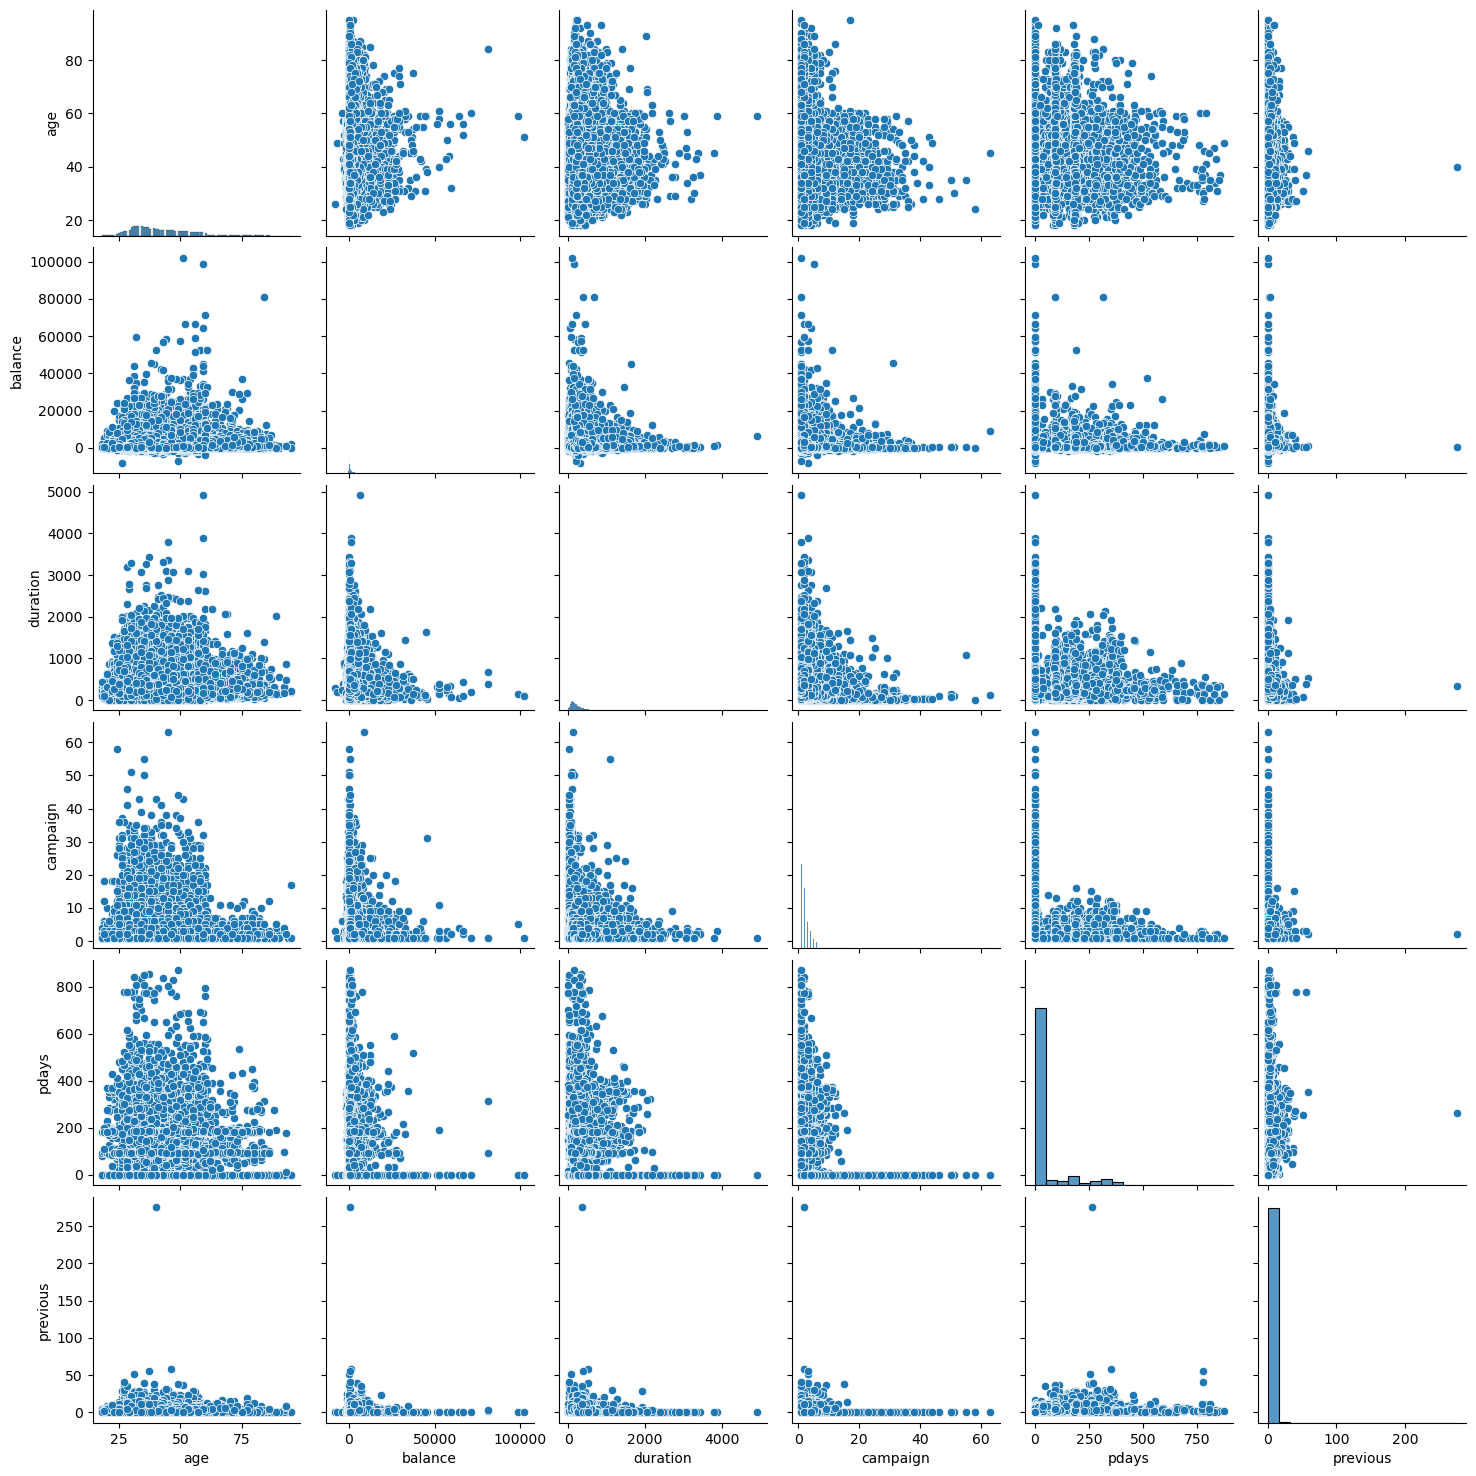

In [18]:
# Multivariate Analysis
# Pairplot of numerical variables
sns.pairplot(df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])
plt.show()

In [21]:
# Logistic Regression
X = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
y = df['y'].map({'yes': 1, 'no': 0})  # Convert target variable to numeric
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
X = sm.add_constant(X)  # Add constant for intercept term

In [22]:
# Fit logistic regression model
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.293213
         Iterations 7


In [23]:
# Leverage and Cook's Distance Calculation
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cook_distance = influence.cooks_distance[0]

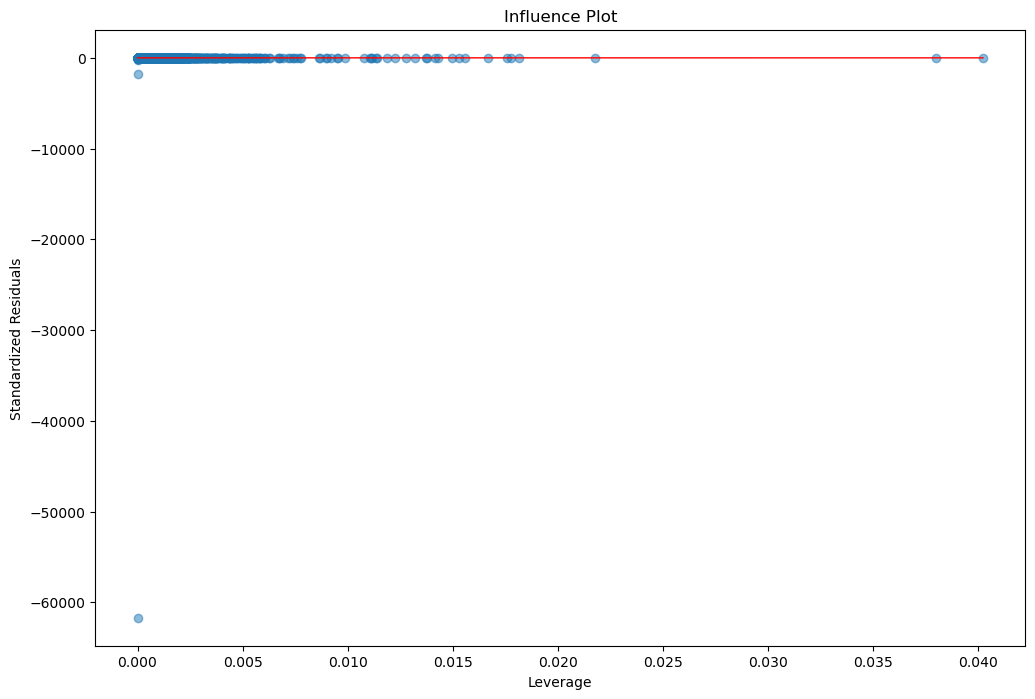

In [25]:
# Influence Plot
plt.figure(figsize=(12, 8))
plt.scatter(leverage, model.resid_pearson, alpha=0.5)
sns.regplot(x=leverage, y=model.resid_pearson, scatter=False, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Influence Plot')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

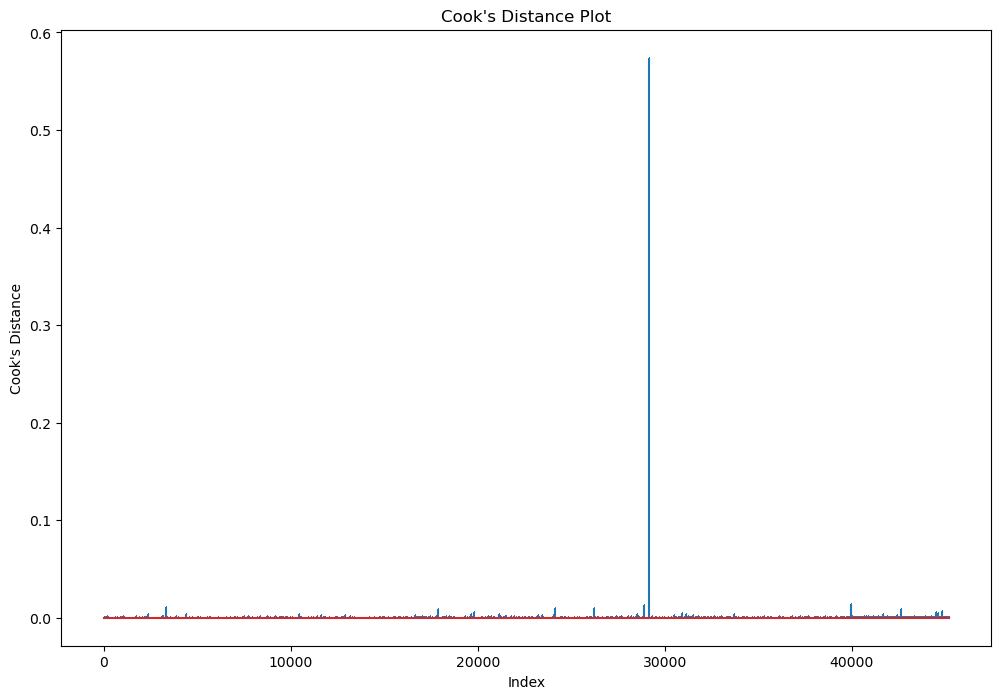

In [26]:
# Cook's Distance Plot
plt.figure(figsize=(12, 8))
plt.stem(cook_distance, markerfmt=",")
plt.title("Cook's Distance Plot")
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.show()

In [27]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Predictions
y_pred = log_reg.predict(X_test)

In [29]:
# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7809  143]
 [ 901  190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.17      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043

